In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
df= pd.read_csv('./textfiles/HPRICE2.raw',delim_whitespace=True, header=None,  names=['price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax'])

#### 1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased. 

* The errors in the linear regression are uncorolated : $ Cov(\epsilon_i,\epsilon_j) = 0, \forall i \neq j $
* They have the same variance (homoscedastic) : $ Var(\epsilon_i) = \sigma^2 < \infty, \forall i $
* They all have a mean of zero : $ E[\epsilon_i] = 0, \forall i  $ 



#### 2. Show that under this assumption the OLS estimators are indeed unbiased.

$ y = X\beta + \epsilon $ and we estimate $\beta$ with $\hat\beta = (X^TX)^{-1}X^Ty$


$$ 

\begin{equation}
    \begin{aligned}
        E[\hat\beta] & = E[(X^TX)^{-1}X^Ty] \\
        & = E[(X^TX)^{-1}X^T(X\beta+\epsilon)] \\
        & = E[(X^TX)^{-1}X^TX\beta] + E[(X^TX)^{-1}X^T\epsilon) & \text{linearity of E} \\
        & = \beta + XE[\epsilon] \\
        &=  \beta & \text{as $E[\epsilon] = 0$ }

    \end{aligned}

\end{equation}

$$


#### 3. Explain the sample selection bias with an example from the course. 

The selection bias refers to a specific bias where your data (population) is not representative of the real data. The example given in class is about planes returning from war zones. People realised that plane returning from war zones had really specific area where they had been shot during their mission. They then upprgraded those planes to be more protected at these specifics areas to ensure less plane crash in combat. What they did not realised was that the plane comming home were not representative of the whole population wich implied a selection bias and therefore a bad conclusion. Indeed, the planes that crashed were not part of the selection for obvious reason. A more thourough reasoning would have been to protect the area where the plane that did come back were not shot as the one where they were shot did not affect their returning

#### 4. Explain the omitted variable bias with an example from the course

Ommited variable bias occurs when a variable wich has impact on the response variable (the Y variable), and is corrolated to the other variables in our statistical analysis is not taken into account. The example in class we talked about was regarding crops. If our mean is to improve our yield and we only look at fertilizer consumption data. We are missing the fact that lands have different quality for production. The land quality definitely have an impact on yield (wich is our mean) and it might also have an impact on fertilizer use. Farmer might prefer to put fertilizer on better land quality as it might improve its yield.

#### 5. Explain the problem of multicollinearity. Is it a problem in this dataset? 

If more than 2 columns of X are (nearly) linearly dependent , then $det(X^TX) = 0$ (or close to it) and it won't have an invert. In our case it means that it is gonna be numerically hard to compute the invert from $X^TX$

In more simple terms multicollinearity happens when two variables measure the exact same thing. We can determine a variable directly based on the other (or close to it)



In [3]:
y = df["price"]
X = df.iloc[:, 1:9]
log = df.iloc[:, 9:]


In [4]:
print('We compute det(X^T*X) =', np.linalg.det((X.T @ X)), ', the value is far from 0. Multicollinearity won t be a problem in our case as it will not make the invert computation harder')

We compute det(X^T*X) = 1.3888028105785238e+31 , the value is far from 0. Multicollinearity won t be a problem in our case as it will not make the invert computation harder


#### 6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-39%, 40%-60%, 61%-100% 
#### 7. Compute for each category of nox level the average median price and comment on your results 


In [5]:
lowNox = df['price'][ df['nox'] <= np.percentile(df['nox'], 39)]
mediumNox = df['price'][ df['nox'] <= np.percentile(df['nox'], 60)][df['nox'] >= np.percentile(df['nox'], 40)]
highNox = df['price'][ df['nox'] >= np.percentile(df['nox'], 61) ]

print( "Price median for lowNox :", np.median(lowNox))
print( "for mediumNox :", np.median(mediumNox))
print( "for highNox :", np.median(highNox))

Price median for lowNox : 24399.0
for mediumNox : 20400.0
for highNox : 16300.0


It seems like Nox and price are anti-corolated as high Nox implies a low median price and conversely for low Nox 

#### 8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect? 


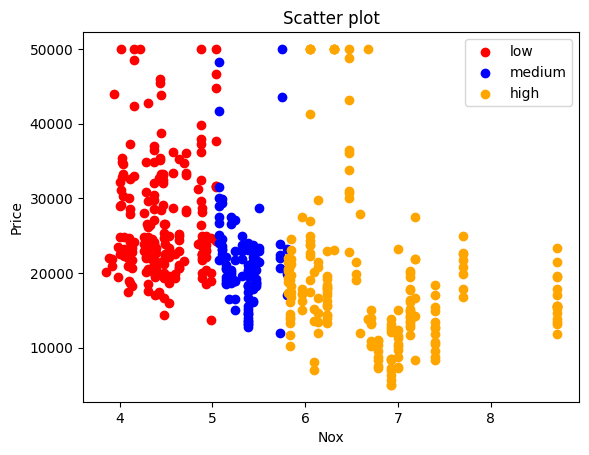

In [6]:
fig, ax = plt.subplots()
x = np.array([df['nox'],np.ones(df['nox'].shape)]).T
y = np.array(y)


plt.scatter(x= df['nox'][df['nox'] <= np.percentile(df['nox'], 39)],y= lowNox, color = 'red', label = 'low')
plt.scatter(x= df['nox'][ df['nox'] <= np.percentile(df['nox'], 60)][df['nox'] >= np.percentile(df['nox'], 40)] ,y= mediumNox, color = 'blue', label = 'medium')
plt.scatter(x= df['nox'][ df['nox'] >= np.percentile(df['nox'], 61)],y= highNox, color = 'orange', label = 'high')
plt.title('Scatter plot')
plt.xlabel('Nox')
plt.ylabel('Price')
plt.legend()
plt.show()

We observe a negative correlation between between price and Nox.
It seems like there is an underlying variable corolated to Nox wich impacts price as Nox at first glance should not have any impact on housing price. Moreover, the other variable are not constant for different Nox values (correlation is not 0 between Nox and other variable). It is not a ceteris paribus effect

#### 9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 


In [7]:
X

,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98
1,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14
2,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03
3,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94
4,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33
...,...,...,...,...,...,...,...,...
501,0.063,5.73,6.59,2.48,1,27.3,21.0,9.67
502,0.045,5.73,6.12,2.29,1,27.3,21.0,9.08
503,0.061,5.73,6.98,2.17,1,27.3,21.0,5.64
504,0.110,5.73,6.79,2.39,1,27.3,21.0,6.48


In [8]:
const= np.ones(y.shape)
X1 = X.drop(['dist','radial','stratio','lowstat'], axis = 1)
X1['const'] = const

beta = np.linalg.inv(X1.T @ X1)@X1.T@y
residual = y - np.array(X1) @ beta

count = residual.value_counts(normalize=True, bins= 10, sort = True)*100

bins = count.index

for i, value in enumerate(count):
    plt.text(bins[i].mid, value, f'{value:.2f}%', ha='center')

plt.hist(residual, bins=10)


plt.xticks( [ bins[i].left for i in range(len(bins))])
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel('val')
plt.ylabel('occurence')
plt.title('Histogram of the residuals')



SSR = np.sum(residual**2)
SST = np.sum((y-np.mean(y))**2)

R2 = 1 - SSR/SST # SST = variance de y, SSR = Somme des carré des résidus

print(100- R2*100, '% des variations de y ne sont pas expliqué par le modèle (dispersion des points autour de la droite)')

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

The residuals are centered arround 0 and they seem to follow a gaussian. The points that are not centered are the one our estimator can't explain. Our ordinary least square methods minimize the quadratic distance between $ X\beta $ and y with $\beta$ as a parameter. When we look at the residual, it measures the vertical distance between y and  $ X\beta $.

We can see more than 22% of of our estimated points have more than a 6260 USD difference with the real data.

In [ ]:
beta, X1

(0     -136.543828
 1     -660.467247
 2     7797.928603
 3      -89.414396
 4   -18682.263753
 dtype: float64,
      crime   nox  rooms  proptax  const
 0    0.006  5.38   6.57     29.6    1.0
 1    0.027  4.69   6.42     24.2    1.0
 2    0.027  4.69   7.18     24.2    1.0
 3    0.032  4.58   7.00     22.2    1.0
 4    0.069  4.58   7.15     22.2    1.0
 ..     ...   ...    ...      ...    ...
 501  0.063  5.73   6.59     27.3    1.0
 502  0.045  5.73   6.12     27.3    1.0
 503  0.061  5.73   6.98     27.3    1.0
 504  0.110  5.73   6.79     27.3    1.0
 505  0.047  5.73   6.03     27.3    1.0
 
 [506 rows x 5 columns])

All negative values implies that they lower the housing price, they have a negative impact (const < nox < crime < proptax < 0). The only variable having a postive impact on price is the number of rooms, if we do not consider the constant variable, room is the one with the most effect on housing price for our estimator by a factor of 10. We also have to consider that all these values don't have the same metric wich means it is harder to compare one to another. The const beta value may represents the none observable variable, but it also allow our linear estimator to not pass through 0 when all variables are.

#### 10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 


38.87391589357874 % des variations de y ne sont pas expliqué par le modèle (dispersion des points autour de la droite)


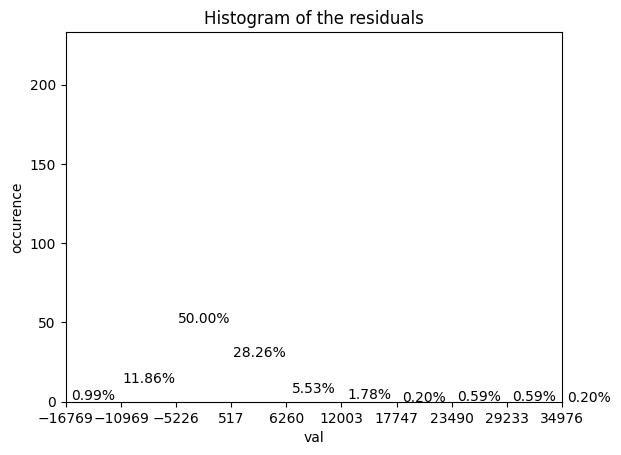

In [ ]:
y2 = log['lprice']
X2 = X1.copy()

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2


count = residual.value_counts(normalize=True, bins= 10, sort = True)*100
bins = count.index
for i, value in enumerate(count):
    plt.text(bins[i].mid, value, f'{value:.2f}%', ha='center')


plt.hist(residual2, bins=10)
plt.xticks( [ bins[i].left for i in range(len(bins))])
plt.xlabel('val')
plt.ylabel('occurence')
plt.title('Histogram of the residuals')

SSR = np.sum(residual2**2)
SST = np.sum((y2-np.mean(y2))**2)

R2 = 1 - SSR/SST # SST = variance de y, SSR = Somme des carré des résidus

print(100- R2*100, '% des variations de y ne sont pas expliqué par le modèle (dispersion des points autour de la droite)')

We can see that R2 is bigger (= 0.62) when we are using a logarithmic response, points are less dispersed arround our estimation. This means that the relation between X and Y is better described than before. As a result, the variance of the residual is lesser wich makes the residuals more centered arround 0 ( only 22% of value have a residual bigger than 0.256 = log(price) - $ \hat\beta X$ using the same number of bins)



In [ ]:
X2,beta2

(     crime   nox  rooms  proptax  const
 0    0.006  5.38   6.57     29.6    1.0
 1    0.027  4.69   6.42     24.2    1.0
 2    0.027  4.69   7.18     24.2    1.0
 3    0.032  4.58   7.00     22.2    1.0
 4    0.069  4.58   7.15     22.2    1.0
 ..     ...   ...    ...      ...    ...
 501  0.063  5.73   6.59     27.3    1.0
 502  0.045  5.73   6.12     27.3    1.0
 503  0.061  5.73   6.98     27.3    1.0
 504  0.110  5.73   6.79     27.3    1.0
 505  0.047  5.73   6.03     27.3    1.0
 
 [506 rows x 5 columns],
 0   -0.012516
 1   -0.047579
 2    0.281556
 3   -0.004263
 4    8.655011
 dtype: float64)

We obviously still have the same order for the beta estimator ( const < nox < crime < proptax < 0 < rooms < constant). Their magnitudes are scaled down as price is too with the logarithmic function

We can read the beta value in this case like so: 
- If there is one more room the price is going to be increased by 0.281556*100 = 28%

They all represent a ration that indicates how much they are going to increase/decrease Y if we add one unit to the variable without changing the others.


#### 11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients. 


38.820830547242934 % des variations de y ne sont pas expliqué par le modèle (dispersion des points autour de la droite)


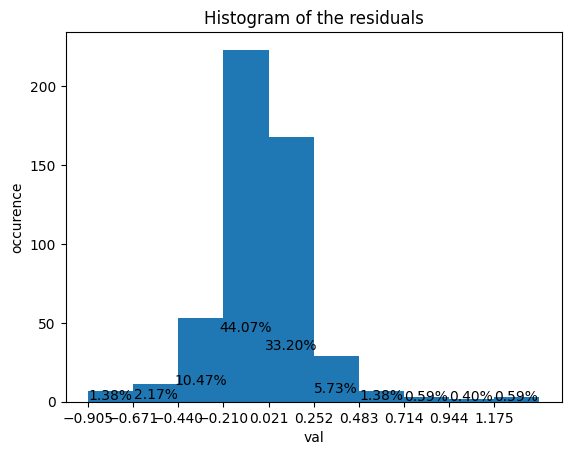

In [ ]:
X3 = X2.drop(['nox','proptax'], axis = 1)
X3['lnox'] = log['lnox']
X3['lproptax'] = log['lproptax']
y3 = y2 

beta = np.linalg.inv(X3.T @ X3)@X3.T@y3
residual = y3 - np.array(X3) @ beta


count = residual.value_counts(normalize=True, bins= 10, sort = True)*100
bins = count.index
for i, value in enumerate(count):
    plt.text(bins[i].mid, value, f'{value:.2f}%', ha='center')


plt.hist(residual, bins=10)
plt.xticks( [ bins[i].left for i in range(len(bins))])
plt.xlabel('val')
plt.ylabel('occurence')
plt.title('Histogram of the residuals')

SSR = np.sum(residual**2)
SST = np.sum((y2-np.mean(y2))**2)

R2 = 1 - SSR/SST # SST = variance de y, SSR = Somme des carré des résidus

print(100- R2*100, '% des variations de y ne sont pas expliqué par le modèle (dispersion des points autour de la droite)')

In [ ]:
beta, X3

(0   -0.012802
 1    0.280175
 2    9.750517
 3   -0.276915
 4   -0.177870
 dtype: float64,
      crime  rooms  const      lnox  lproptax
 0    0.006   6.57    1.0  1.682688  5.690360
 1    0.027   6.42    1.0  1.545433  5.488938
 2    0.027   7.18    1.0  1.545433  5.488938
 3    0.032   7.00    1.0  1.521699  5.402678
 4    0.069   7.15    1.0  1.521699  5.402678
 ..     ...    ...    ...       ...       ...
 501  0.063   6.59    1.0  1.745715  5.609472
 502  0.045   6.12    1.0  1.745715  5.609472
 503  0.061   6.98    1.0  1.745715  5.609472
 504  0.110   6.79    1.0  1.745715  5.609472
 505  0.047   6.03    1.0  1.745715  5.609472
 
 [506 rows x 5 columns])

Again the R value is slightly higher than the previous one wich implies this model fits the best our Y. The residual histogram shows this result as the 2 bins in the middle have a higher percentage than the 2 other residual computed before.

The last 2 values of the beta vector comes from log variable. They are comonly described as elasticities as they represent the ratio between the percentage increase from one variable and its impact in percentage to the other.

In our case : 

$$ \beta_{lprop}  = \frac{\Delta_{price}*lprop}{\Delta_{lprop}*price} $$

#### 12. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ >0 vs. H1: $\beta_{nox}$ < 0 at the 10% level

On utilise le test de student comme notre coefficient suit une loi normale

In [ ]:
from scipy.stats import t, f

In [ ]:
X2 = X1.copy()
y2 = log['lprice']

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2

n, k = np.shape(X2)
sig2 = residual2.T@residual2/(n-k)

#beta
var = sig2*np.linalg.inv(X2.T @ X2)
std = np.sqrt(np.diag(var))

z = beta2[1]/std[1]

qAlpha = t.ppf(0.1,n-k)
print('student :', z) 
print('quantile d ordre 0.1 :', qAlpha)

print(1- t.sf(z,n-k))


student : -3.5570290100062327
quantile d ordre 0.1 : -1.2832436320111769
0.00020534795263027483


Le quantile d'ordre $\alpha$ pour la loi de student de 501 degré de liberté est supèrieur à notre statistique de test. On rejette donc H0

#### 13. In the specification of question 10, test the hypothesis H0: $\beta_{nox} = 0 vs. H1: \beta{nox} ≠ 0 $ at the 10% level using the p-value of the test 

In [ ]:
qAlpha = t.ppf(0.05,n-k)
print('student :', z) 
print('quantile d ordre 0.05 :', qAlpha)
print('p-value :', 2*(1-t.sf(z , n-k)))

student : -3.5570290100062327
quantile d ordre 0.05 : -1.6479007483164256
p-value : 0.00041069590526054967


We find 2*p-value < 0.1, we reject H0 $\beta{nox} = 0 $

We reject the non-significance hypothesis for Nox

#### 14. In the specification of question 10, test the hypothesis H0: $\beta{crime} = \beta{proptax} $ at the 1% level 


In [ ]:
X2 = X1.copy()
X2['proptax+crime'] = X2['proptax'] + X2['crime']
X2 = X2.drop(['proptax'], axis = 1)

print(X2.columns.values)

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2
n, k = np.shape(X2)
sig2 = residual2.T@residual2/(n-k)
#beta
var = sig2*np.linalg.inv(X2.T @ X2)
std = np.sqrt(np.diag(var))

z = beta2[0]/std[0]

print(z)

print('p-value :', (1-t.sf(z , n-k)))



['crime' 'nox' 'rooms' 'const' 'proptax+crime']
-3.6235808366262634
p-value : 0.00016010403229460568


p-value < 0.1, on rejette donc notre hypothèse H0

#### 15. In the specification of question 10, test the hypothesis H0: $\beta_{nox} = 0, \beta_{proptax}= 0 $ at the 1% level

In [ ]:

#non contraint
X2 = X1.copy()
n, k = np.shape(X2)
beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2
SSR0 = residual2.T@residual2

#contraint
X2 = X2.drop(['nox','proptax'], axis = 1)
beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2
SSR1 = residual2.T@residual2

F =  ((SSR1-SSR0)/2)/(SSR0/(n-k))
print(f.sf(F,2,n-k))

2.529376422561145e-14


p-value < 0.01, we reject H0

#### 16. In the specification of question 10, test the hypothesis H0: $\beta_{nox} = -500, \beta_{proptax} = -100 $ at the 1% level using the p-value of the test 


In [ ]:
X2 = X1.copy()

y3 = log['lprice']* + (X2['nox'] *500 + X2['proptax'] *100) 

X2 = X2.drop(['nox','proptax'], axis = 1)

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y3
residual2 = y3 - np.array(X2) @ beta2

SSR1 = residual2.T@residual2 #SSR contraint

T =  ((SSR1-SSR0)/2)/(SSR0/(n-k))
print('p_value :', f.sf(T,2,n-k))

p_value : 0.0


p value < 0.01 --> we reject H0

#### 17. In the specification of question 10, test the hypothesis H0: $\beta_{nox} + \beta_{proptax} = -1000 $ at the 1% level using the p-value of the test 

$ \beta_{nox} = - 1000 - \beta_{proptax} -\sigma$ 

$ \beta_{nox} X_{nox} +  \beta_{proptax}X_{proptax} = \beta_{proptax}(X_{proptax}-X_{nox}) -1000X_{nox} - \sigma X_{noc} $ 

On estime $y + 1000X_{nox}$ par crime rooms nox (proptax-nox) et const 


In [ ]:
y3 = log['lprice'] + 1000*X1['nox'] 
X3 = X1.copy()

X3['Xproptax-Xnox'] = X['proptax'] - X['nox']
X3 = X3.drop(['proptax'], axis = 1)

n, k = X3.shape

beta3 = np.linalg.inv(X3.T @ X3)@X3.T@y3
residual3 = y3 - np.array(X3) @ beta3

sig2 = residual3.T@residual3/(n-k)
var = sig2*np.linalg.inv(X3.T @ X3)
std = np.sqrt(np.diag(var))

z = (beta3[1])/std[1]
print(z)
print('p-value :', t.sf(z , n-k))

-77853.88070133793
p-value : 1.0


On ne rejette pas l'hypothèse (p-value > 0.01)

#### 18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox



In [ ]:
X3 = X1.copy()
y3 = log['lprice']

# modele contraint sans les variables d'interaction

model=sm.OLS(y3,X3)
results = model.fit()
u=results.resid
SSRr=u.T@u

#modele non contraint 

lowNoxBin = np.where(df['nox'] <= np.percentile(df['nox'], 39),1,0)

X3['lowNoxCrime'] = X3['crime']*lowNoxBin
X3['lowNoxProptax'] = X3['proptax']*lowNoxBin
X3['lowNoxRooms']= X3['rooms']*lowNoxBin
X3['lowNoxNox']= X3['nox']*lowNoxBin
X3['lowNoxBinary'] = lowNoxBin

n, k = X3.shape

model=sm.OLS(y3,X3)
results = model.fit()
u=results.resid
SSRur=u.T@u

F = (SSRr - SSRur)/5 * (n-k-1)/SSRur

print('F :', F)
print('p-value :',f.sf(F,5,n-k))



F : 3.618916402568514
p-value : 0.0031727510844337366


p-value < 0.01, we reject H0. 

#### 19. Repeat the test of question 18 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test H0. 


In [ ]:
X3 = X1.copy()
y3 = df['price']

# modele contraint 

model=sm.OLS(y3,X3)
results = model.fit()
u=results.resid
SSRr=u.T@u

#modele non contraint avec variable d'interaction

lowNoxBin = df['nox'] <= np.percentile(df['nox'], 39) 

X3['lowNoxProptax'] = X3['proptax']*lowNoxBin
X3['lowNoxNox']= X3['nox']*lowNoxBin
X3['lowNoxBinary'] = np.where(lowNoxBin,1,0)

n, k = X3.shape

model=sm.OLS(y3,X3)
results = model.fit()
u=results.resid
SSRur=u.T@u

#modele contraint 

F = (SSRr - SSRur)/3 * (n-k-1)/SSRur

print('F :', F)
print('p-value :',f.sf(F,3,n-k))

F : 2.4318295445327154
p-value : 0.06434726702067234


$ price =  \beta_{0} + \sigma_{0} * lNoxBinary + \beta_{nox} X_{nox} +  \sigma_{1} X_{nox} *lNoxBinary +  \beta_{proptax}X_{proptax} + \sigma_{2} X_{proptax} *lNoxBinary + \beta_{crime}X_{crime} + \beta_{rooms}X_{rooms} $


H0 : $ \sigma_{0} = \sigma_{1} = \sigma_{2} = 0 $

p-value = 0.064, on ne rejette pas l'hypothèse H0 meme au niveau 5%. Pour traduire, rejeter H0 prouverais que les groupes low Nox et high/medium Nox impactent differemment le prix du logement en fonction des variables Nox et proptax. Dans notre cas, on ne rejette pas H0, la différence de groupe pour ces variables n'ont donc potentiellement pas d'impact (mais on ne peut peut etre sur de rien).


#### 20. Explain the problem of heteroscedasticity with an example of the course. 

Heterosckedascity is when the disturbance random variables (u) does not have a constant variance. It happens when the variable depends on the $X_i$ variable or their indices. It can be detected using a test by supposing linearity on u^2 and test if all coefficient are null (ie : $Var(u) = E[u^2] = C, \forall C$  )

The problem is our estimator is based on the ordinary least squares method wich assumes homescedacity (one of the hypothesis to assert our estimator is optimal wich allows us to calculate Var(Beta)). 

#### 21. Suppose that $E[\epsilon \epsilon^T] = \sigma^2\Omega $ . Show that the GLS estimator is the best linear unbiased estimator. 

$ \hat\beta = (X^T\Omega^{-1} X)^{-1} X^T\Omega^{-1}y $ 

$ E[\hat\beta] = E[(X^T\Omega X)^{-1} X^T\Omega^{-1} (X\beta + u)]  = \beta + X^{-1} E[\epsilon] = \beta $

So unbiased

$\Omega = CC^T = LDL^T $ cholesky decomposition and LDL decomposition with $ C = LD^{1/2} $ 

$\hat\beta$ can be estimated by resolving a linearly transformed version of the Data :

$ C^{-1} y = C^{-1} X\beta+ C^{-1} \epsilon = y^* = X^*\beta+ \epsilon^*$

So that we minimize : $\epsilon^*(\epsilon^*)^T = (y^* - X^*\beta)^T(y^* - X^*\beta)= (y^ - X^\beta)^T\Omega(y^ - X^\beta)$

$ Var(\epsilon^*) = E[\epsilon^*(\epsilon^*)^T] = E[C^{-1}\epsilon(C^{-1}\epsilon)^T]$

With $C^{-1} = (LD^{1/2})^{-1} = D^{-1/2}L^{-1} = D^{-1/2}L^T $ as L orthogonal

So : 
\begin{equation}
\begin{split}
Var(\epsilon^*) &= \sigma^2 C^{-1} \Omega (C^{-1})^T = \sigma^2 D^{-1/2}L^T \Omega (D^{-1/2}L^T)^T \\
&= \sigma^2 D^{-1/2}L^T (LDL^T) L D^{-1/2} \\
&= \sigma^2 D^{-1/2} D D^{-1/2} = \sigma^2 I = \sigma^2
\end{split}  
\end{equation}

As a result the errors from the modified linear model are homoskedastic and uncorrelated. It implies that our least square estimator is efficient (with the hypothesis : $E[\epsilon \epsilon^T] = \sigma^2\Omega $) 


As a result it is the best linear unbiased model.


#### 22. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test H0: $\beta_{crime}, \beta_{nox}, \beta_ {room}, \beta_{proptax} = 0$, where the coefficients $\beta_k$ (k = crime, nox, rooms, proptax) are associated 
 

In [ ]:
X2 = X1.copy()
y2 = log['lprice']
X2
beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2

model = sm.OLS(residual2**2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.33e-14
Time:                        16:12:21   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crime      -3.794e-05      0.001     -0.035      0.9

F statistic = 17.98 with a probability of 8.33e-14, we reject H0 (p <0.01). We reject the hypothesis of no heteroskedascity of linear form.

#### 23. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form

In [ ]:
X2 = X1.copy()

X3 = X2.drop(['nox','proptax'], axis = 1)
X3['lnox'] = log['lnox']
X3['lproptax'] = log['lproptax']

y3 = log['lprice'] 

beta3 = np.linalg.inv(X3.T @ X3)@X3.T@y3
residual = y3 - np.array(X3) @ beta3

model = sm.OLS(residual**2, X3)

results = model.fit()
print('F', results.fvalue, 'p_value :', results.f_pvalue)




F 16.509872938631027 p_value : 1.0205916389660978e-12


F = 16.19, p_value = 1.76e-12 < 0.01, We reject the hypothesis H0

#### 24. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form

In [ ]:
X2 = X1.copy()
y2 = y.copy()

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2

model = sm.OLS(residual2**2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        16:12:21   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crime      -9.687e+05   7.69e+05     -1.260      0.2

F = 6.799, p_value = 2.47e-05 < 0.01, We reject the hypothesis H0

#### 25. Comment on the differences between your results of questions 22,23, 24.

We find :

$\textbf{9/ price : constant, crime, nox, rooms, proptax}$ :  F-statistic: 6.799, p_value = 2.47e-05

$ \textbf{10/ lprice : constant, crime, nox, rooms, proptax}$ : F-statistic: 17.98, p_value = 8.33e-14

$ \textbf{11/ lprice : constant, crime, lnox, rooms, lproptax}$ : F-statistic: 16.16, p_value =1.76e-12


The p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. It means that the closest to 0 the p value is, the most unlikely our hypothesis will be true. As a result we can compare our p-value results to assess wich are the variable wich limit the most the difference in variance from our errors (heteroskedascity)

In our case, the specification from question 9 is the 'best' variable choice to limit heteroscedascity.

#### 26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.



In [ ]:
X2 = X1.copy()
y2 = df['price']

beta2 = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual2 = y2 - np.array(X2) @ beta2


# On test BetaX = 0 pour chaque variable, la p value la plus basse indique celle qui a le plus de probabilité de ne pas etre egale à 0 (la plus eloigné de 0)
model = sm.WLS(y2, X2, weights= 1/X2['proptax'])
results = model.fit()
print(results.rsquared)

model = sm.OLS(y2, X2)
results = model.fit()
print(results.rsquared)


0.6754267657837891
0.5751927393562669


The R squared value significantly increases with the variable causing heteroskedascity as weight. The model explains 67% of the relationship between price and the other variable compared to 57% before.

To check our answer, we can choose the variable using the variance inflation factor : proptax


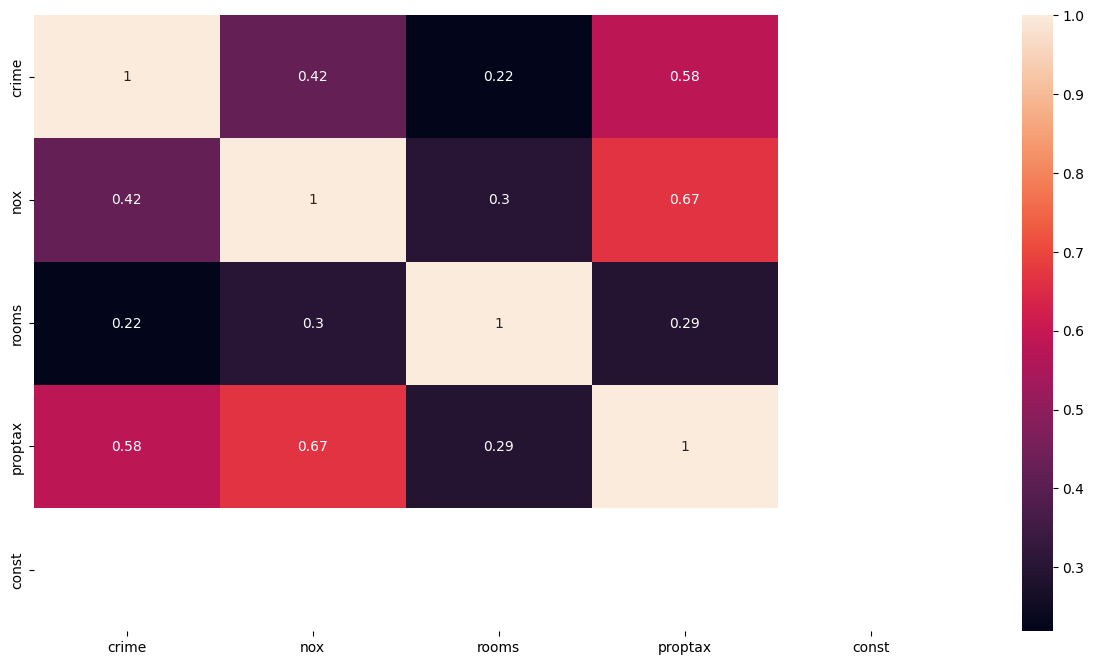

In [ ]:
import seaborn as sns   
plt.figure(figsize = (15,8))   ## Size of the figure
sns.heatmap(X2.corr().abs(), annot = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor 

print('To check our answer, we can choose the variable using the variance inflation factor :', X2.columns.values[np.argmax([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1] - 1)])])